In [1]:
#Adds higher directory to path, so we can access /ATS
import sys
sys.path.append("../")

from ATS.general import *
from ATS.QAQC import *

import pandas as pd

# Set the DataFram in pandas to show all columns and 1000 rows. Display plots inline
pd.options.display.max_columns = None
pd.set_option('display.max_rows',500)

<Item title:"SAC Native Plants" type:Feature Layer Collection owner:Anooshi>
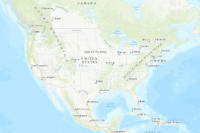

In [2]:
output = arcGIS_data_load('6b104538a3ad48c3b5c0d055e171455d')
data = output['data0']
feature_service = output['feature_service']

In [0]:
# Subset data for desired year. This part of the script was not used because we only have one year of data (2019)
data.rename(columns={"Date": "Observation_Date"}, inplace=True)
sYear = input("Start Year? (YYYY)")
sub = year_subset(data,sYear)

In [3]:
# column header names
data.columns

Index(['OBJECTID', 'Observation_Date', 'Observer_1', 'Observer_2', 'Species',
       'Patch_Width', 'Patch_Length', 'Comments', 'Population', 'Phenology',
       'GlobalID', 'ESRIGNSS_RECEIVER', 'ESRIGNSS_H_RMS', 'ESRIGNSS_AVG_H_RMS',
       'SHAPE'],
      dtype='object')

In [4]:
validate_domains(feature_service)
#Check number of entries against ArcGIS Online



Table/Layer:  SAC_Native_Plants


No Mismatches Found


In [5]:
QAQC_whitespace(data, exclude_cols=['Comments'])

Name of Object ID Column:  ['OBJECTID']


Analysis for: Population
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: Observer_1
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: GlobalID
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: ESRIGNSS_RECEIVER
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: ESRIGNSS_H_RMS
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: Species
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: Phenology
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: Observer_2
No \xa0 characters found
No doub

In [43]:
data.count()

OBJECTID              126
Observation_Date      126
Observer_1            126
Observer_2            36 
Species               126
Patch_Width           126
Patch_Length          126
Comments              114
Population            126
Phenology             126
GlobalID              126
ESRIGNSS_RECEIVER     74 
ESRIGNSS_H_RMS        0  
ESRIGNSS_AVG_H_RMS    74 
SHAPE                 126
dtype: int64

In [26]:
find_blank_entries(data, exclude_cols = ['Observer_2','ESRIGNSS_RECEIVER','Comments','ESRIGNSS_H_RMS','ESRIGNSS_AVG_H_RMS'])

No blank Phenology
No blank SHAPE
No blank Patch_Length
No blank Observation_Date
No blank GlobalID
No blank Population
No blank Species
No blank Observer_1
No blank Patch_Width
No blank OBJECTID


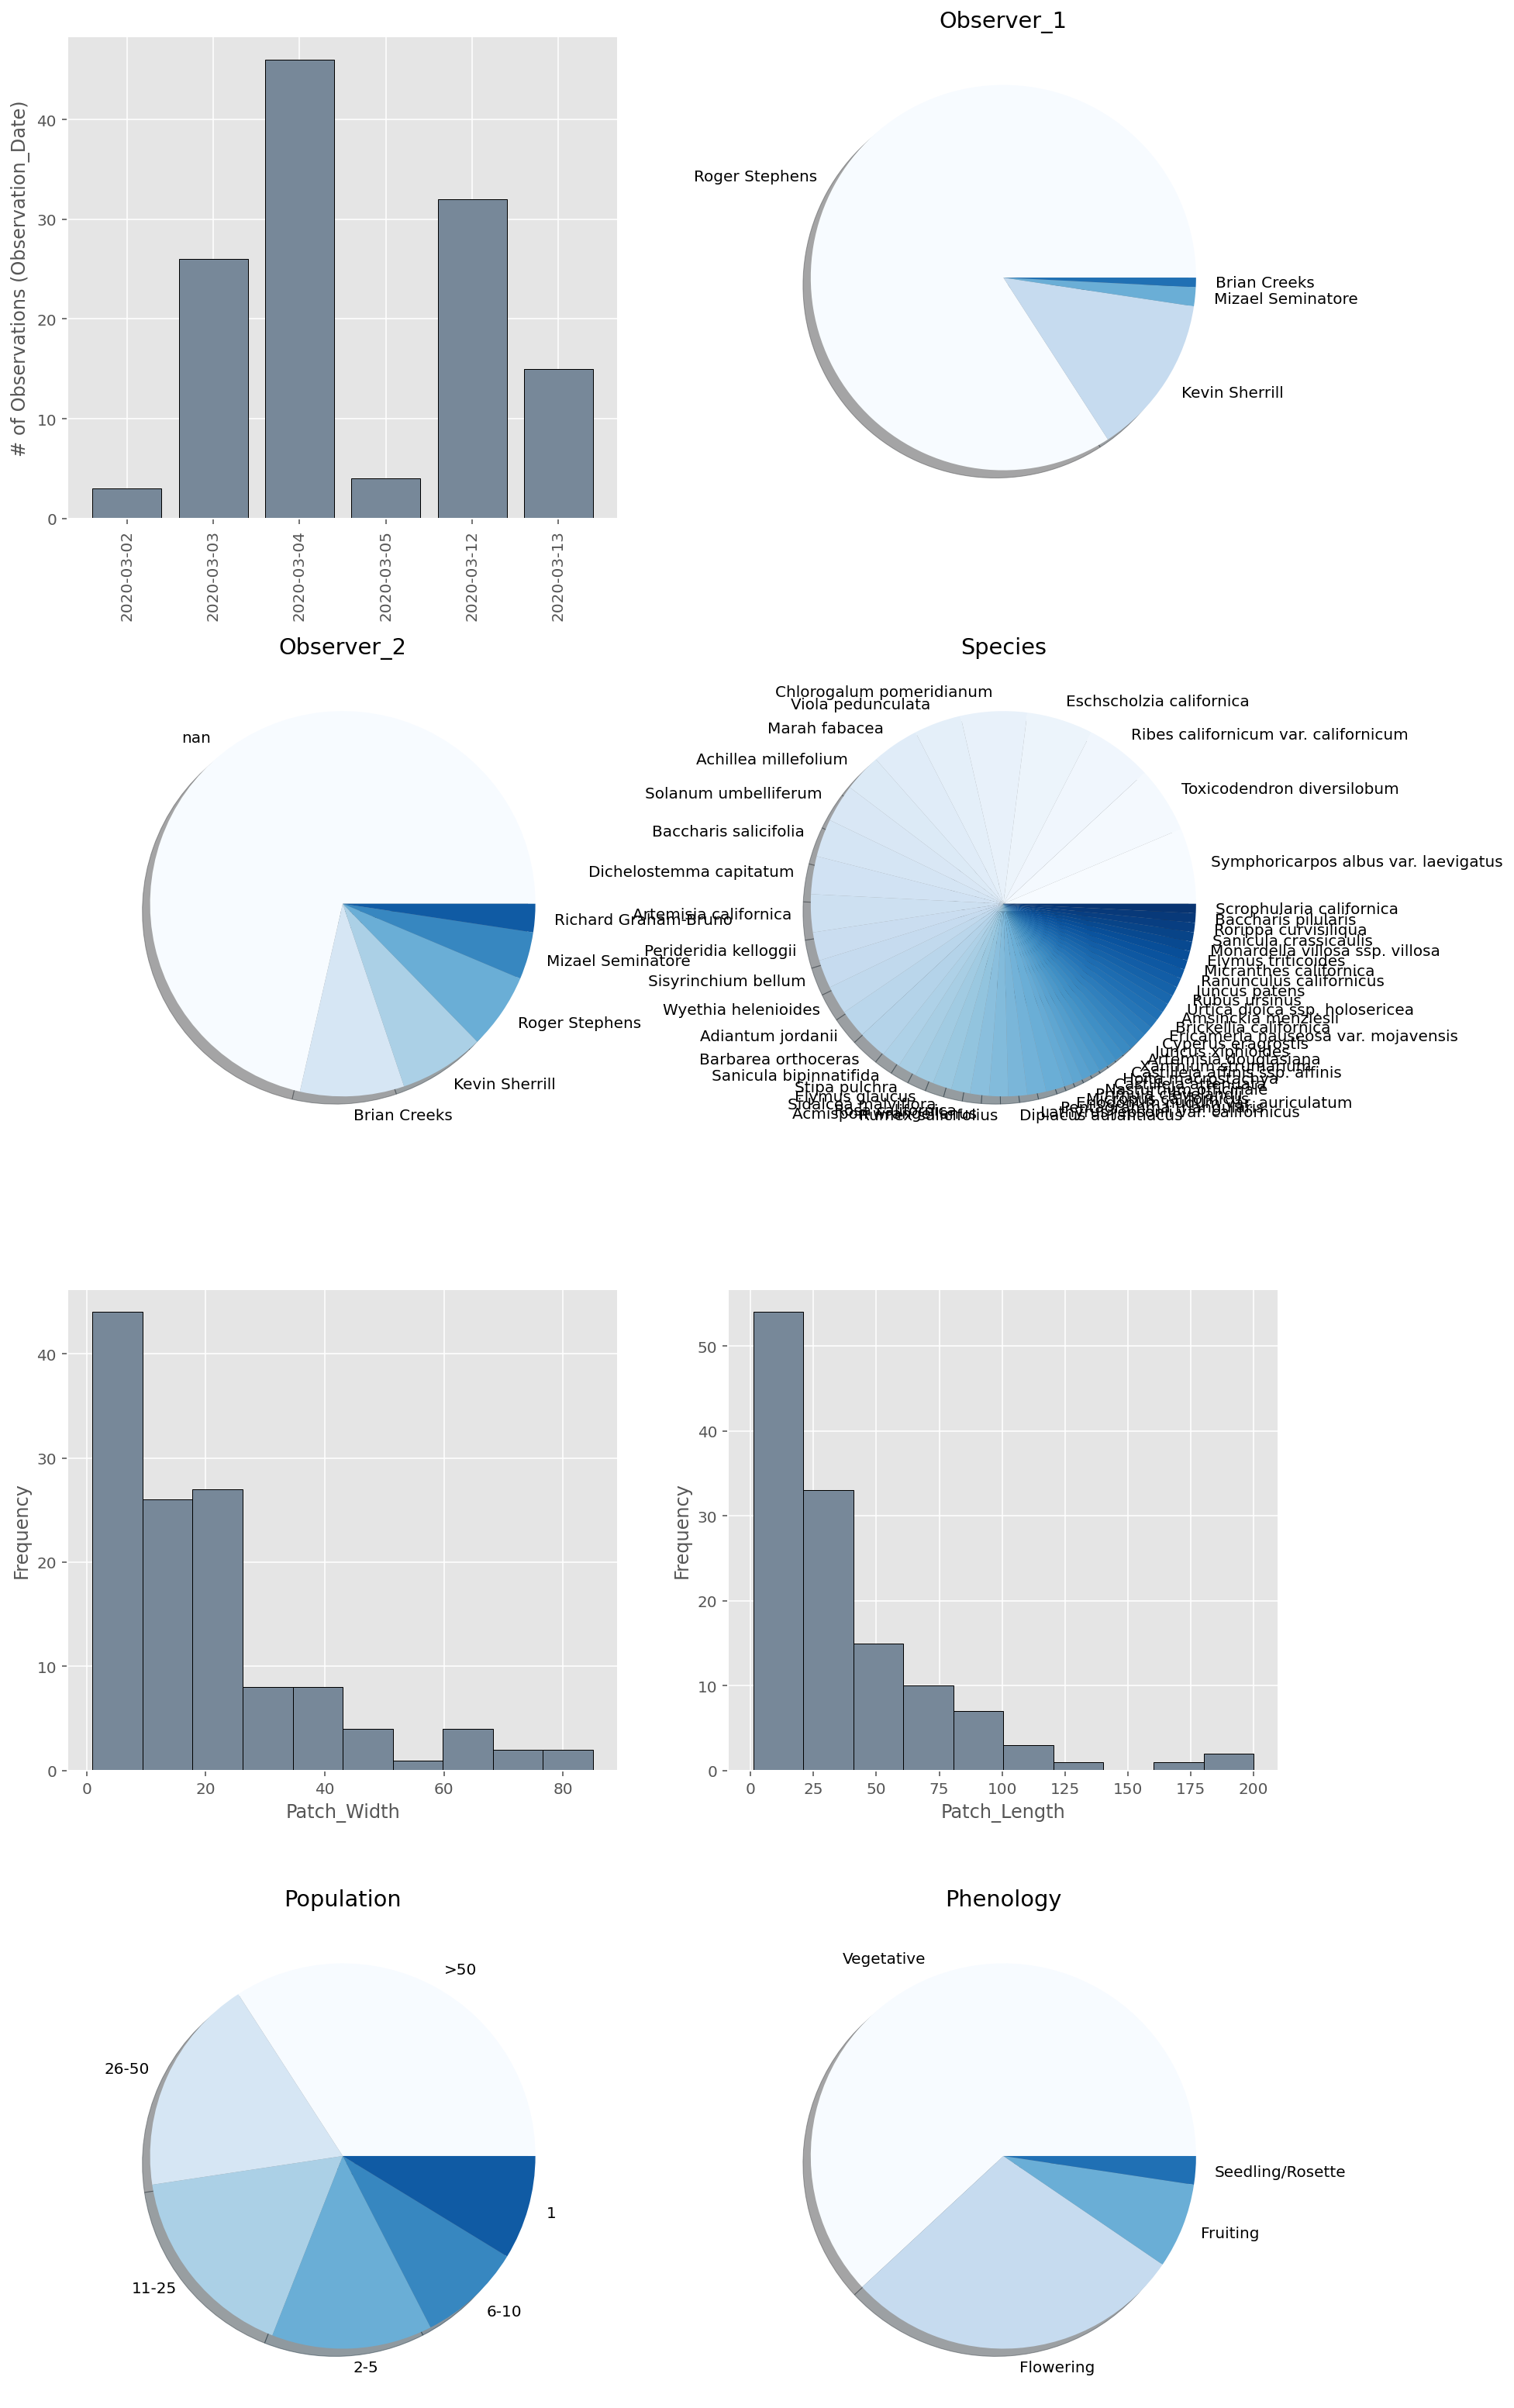

In [7]:
QAQC_plot(data, cols_to_plot=['Observation_Date', 'Observer_1', 'Observer_2', 'Species', 'Patch_Width', 'Patch_Length', 'Population', 'Phenology'])

Patch_Length  Outlier: True
See Outlier Entries Below:


,OBJECTID,Observation_Date,Observer_1,Observer_2,Species,Patch_Width,Patch_Length,Comments,Population,Phenology,GlobalID,ESRIGNSS_RECEIVER,ESRIGNSS_H_RMS,ESRIGNSS_AVG_H_RMS,SHAPE,Patch_Length_Outlier
11,23,2020-03-03 18:48:31,Roger Stephens,Kevin Sherrill,Sanicula bipinnatifida,80,120,On west facing slope mixed in with other natives plants. Some individuals flowering.,>50,Vegetative,75a2796f-387c-42a6-b636-3652c6bd2d1c,GNSS:84558,None,2.577837,"{'x': 6190327.913498315, 'y': 2037843.4768061081, 'spatialReference': {'wkid': 103005, 'latestWkid': 6420}}",True
52,64,2020-03-04 19:25:42,Roger Stephens,None,Chlorogalum pomeridianum,20,125,Spans across the top of the ridge.,>50,Seedling/Rosette,79f4f5a7-52d0-44f5-a7fc-c65901c91e14,iPhone X,None,5.000000,"{'x': 6190648.311670075, 'y': 2037723.6456169037, 'spatialReference': {'wkid': 103005, 'latestWkid': 6420}}",True
114,126,2020-03-13 20:15:12,Roger Stephens,None,Chlorogalum pomeridianum,40,120,Large patch on small mound up to toe of the slope to the East.,>50,Vegetative,affeb720-071b-4911-bf9d-ad2bc3766dc6,None,None,NaN,"{'x': 6184784.933984345, 'y': 2036467.2340452683, 'spatialReference': {'wkid': 103005, 'latestWkid': 6420}}",True
119,131,2020-03-13 21:12:06,Roger Stephens,None,Xanthium strumarium,70,200,Large swath of old fruits and skeletons along bank of IC. New germinating sprouts present.,>50,Vegetative,939b8c62-73de-4059-a30c-6b5356f6aff5,iPhone X,None,5.000000,"{'x': 6181587.168625405, 'y': 2037898.3935280456, 'spatialReference': {'wkid': 103005, 'latestWkid': 6420}}",True
124,136,2020-03-13 20:16:15,Kevin Sherrill,Roger Stephens,Chlorogalum pomeridianum,85,180,None,>50,Vegetative,2b6bf07e-3197-4882-86b8-5494dabb24d9,iPhone XS Max,None,4.880409,"{'x': 6184926.630474565, 'y': 2036431.7960825241, 'spatialReference': {'wkid': 103005, 'latestWkid': 6420}}",True
125,137,2020-03-13 21:15:30,Kevin Sherrill,Roger Stephens,Rorippa curvisiliqua,20,200,Directly adjacent to reservoir.,11-25,Flowering,c65da795-acea-4e7c-91b5-00303f9d9900,iPhone XS Max,None,4.745262,"{'x': 6181563.329898065, 'y': 2037923.366707727, 'spatialReference': {'wkid': 103005, 'latestWkid': 6420}}",True


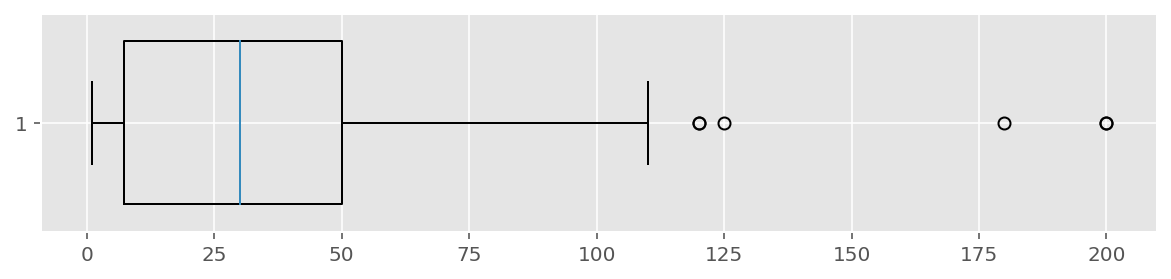

In [9]:
find_outlier(data, check_cols=['Patch_Length'], boxplot=True)

Dropping surveyors with less than 6.300000000000001 observations
They did not make over 5% of total observation
Dropping Surveyors: ['Mizael Seminatore' 'Brian Creeks']


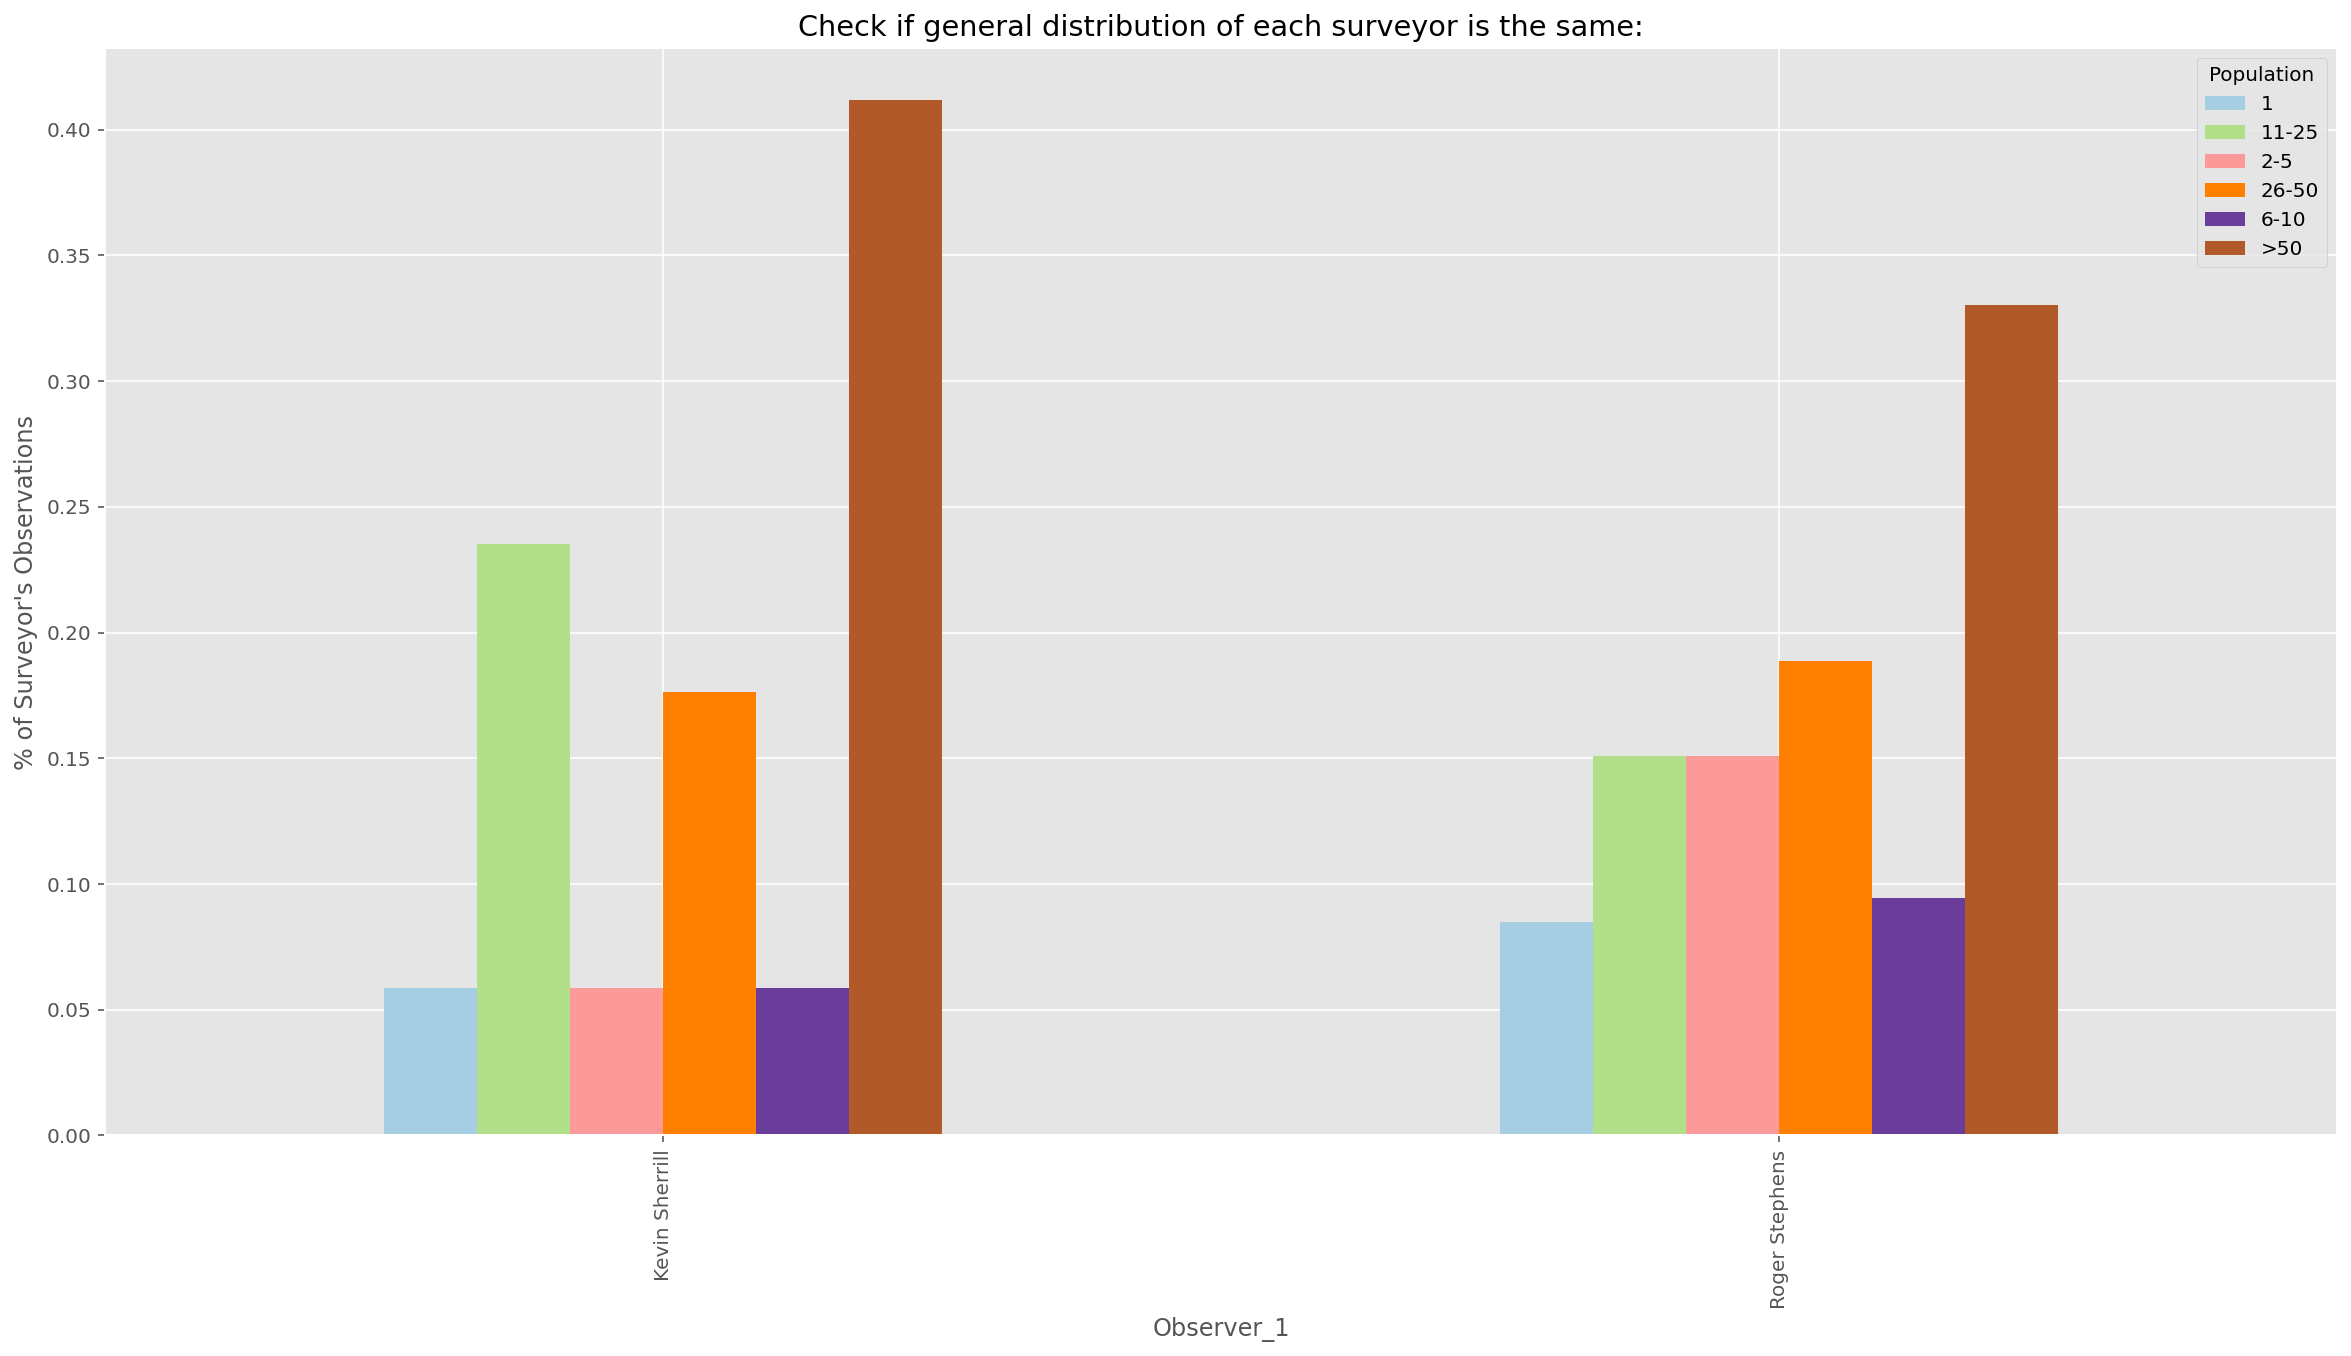

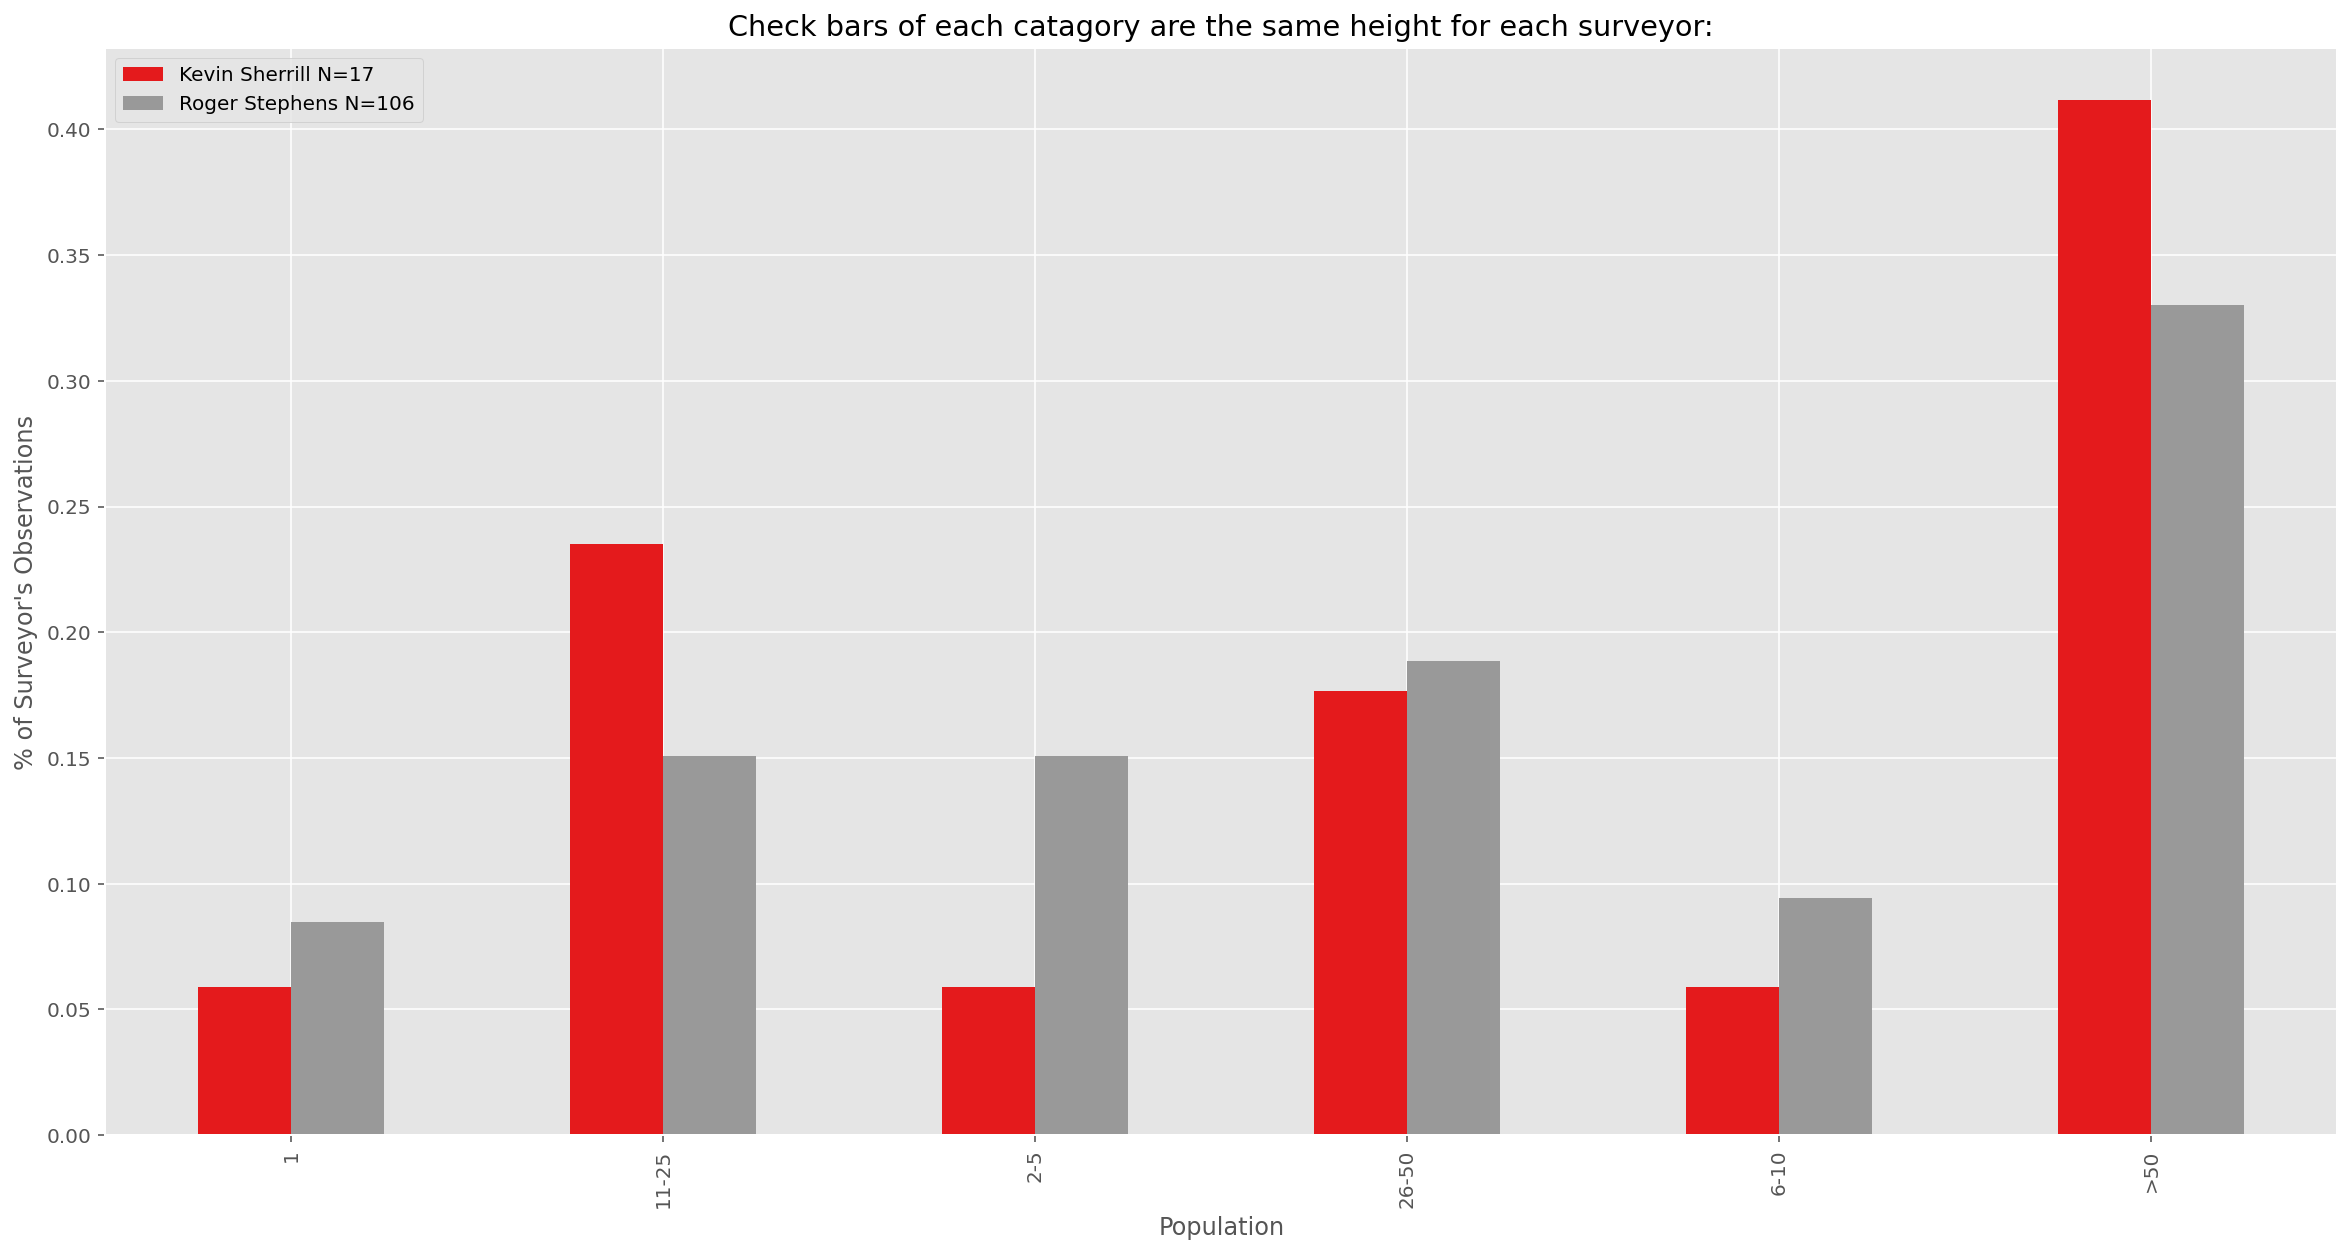

In [11]:
compare_surveyors(data, 'Population', obs_var='Observer_1', drop=5)

In [16]:
QAQC_gps(data,5)

No entries above spatial error threshold
